# **Data Cleaning Procedures for Scientific Instrument Makers' Dataset**
 

# **1. Mount the Drive** 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **2. Load the Required Libraries** 

In [19]:
import pandas as pd
import re
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime



In [20]:
!pip install ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
%run /content/drive/MyDrive/colab_notebooks/tok_key.ipynb


# **3. Clean the Individuals Data** 

In [ ]:
# Read in the raw data file from Github
i_url = "https://raw.githubusercontent.com/MissMaya/CASA0004_DISSERTATION_DATA/main/raw_data/individuals.csv"
i_df = pd.read_csv(i_url)

In [ ]:
# Check the initial shape and column headings of the dataframe 
i_df.head()

,Id,Label,timeset,0,1,2,3
0,2806,2806,NaN,1808,1808,William,\
1,2028,2028,NaN,1808,1833,Philip,CARPENTER
2,1122,1122,NaN,1805,1822,Aaron,AARON
3,1671,1671,NaN,1801,1801,Isaac,AARON & CO.
4,1670,1670,NaN,1794,1814,Isaac,AARON & SON


In [ ]:
# Check the data types
i_df.dtypes

Id           int64
Label        int64
timeset    float64
0           object
1           object
2           object
3           object
dtype: object

In [ ]:
# Convert columnn names to lower case 
i_df.columns = i_df.columns.str.lower()

In [ ]:
# Drop any rows with null values in "id" column
i_df = i_df.dropna(subset = ["id"])

In [ ]:
# Check that there are no duplicate values in the "id" column 
i_df["id"].duplicated().sum()

0

In [ ]:
# Check if the id and label columns contain the same values
i_df["id"].equals(i_df["label"])

True

In [ ]:
# Drop the label column as it is a duplicate 
i_df = i_df.drop(["label"], axis = 1)

In [ ]:
# Check if all values in the "timeset" column are null and drop the column if this is the case 
if i_df["timeset"].isnull().all():
  i_df = i_df.drop(["timeset"], axis = 1)

In [ ]:
# Rename columns labelled '0', '1', '2' and '3'

i_df.rename(columns = {"0" : "year_from", "1" : "year_to", "2" : "first_name", "3" : "last_name"}, inplace = True)


In [ ]:
# Rename all values not containing 4 digits from the "year_from" and "year_to" columns 
i_df["year_from"] = i_df["year_from"].str.replace(r"^(?!\d{4}).*", "no_date", regex = True)
i_df["year_to"] = i_df["year_to"].str.replace(r"^(?!\d{4}).*", "no_date", regex = True)

In [ ]:
# Rename all null values in "year_from" and "year_to" columns (regex did not capture these)
i_df["year_from"] = i_df["year_from"].fillna("no_date")
i_df["year_to"] = i_df["year_to"].fillna("no_date")

In [ ]:
# Rename null values in "first_name column" 
i_df["first_name"] = i_df["first_name"].fillna("UNKNOWN")

In [ ]:
# Rename null values in "last_name column"
i_df["last_name"] = i_df["last_name"].fillna("UNKNOWN")

In [ ]:
# Rename values in "first_name" column labelled "#NAME?"
i_df["first_name"] = i_df["first_name"].str.replace("#NAME?", "UNKNOWN", regex = False)

In [ ]:
# Rename values in "last_name" column labelled "\"
i_df["last_name"] = i_df["last_name"].str.replace("\\", "UNKNOWN", regex = False)

In [ ]:
# Create a new column "identifier" which is a string version of the "id" column
# New column created as converting "id" to string had implications for procedures further on in the process

i_df["id_string"] = i_df["id"].copy().apply(str)

In [ ]:
# Convert the formats of the year_from and year_to columns to YYYY-MM-DD HH:mm:ss format in new columns 
# Convert now to make it easier to use these dates in subsequent GraphXR visualisations
# GraphXR prefers YYYY-MM-DD HH:mm:ss format for dates and times and it is easier to convert in Python rather than via Cypher

i_df["year_from_dt"] = i_df["year_from"].apply(lambda x: "no_date" if x == "no_date" else datetime.strptime(x, "%Y").strftime("%Y-%m-%d %H:%M:%S"))

i_df["year_to_dt"] = i_df["year_to"].apply(lambda x: "no_date" if x == "no_date" else datetime.strptime(x, "%Y").strftime("%Y-%m-%d %H:%M:%S"))


In [ ]:
# Check of the data types to confirm all is as expected 
i_df.dtypes

id               int64
year_from       object
year_to         object
first_name      object
last_name       object
id_string       object
year_from_dt    object
year_to_dt      object
dtype: object

In [ ]:
# Create a new column "full_name" consisting of first character from "first_name" and full string from "last_name"
# If first name is unknown only the last name is taken 
i_df["full_name"] = np.where(i_df["first_name"] == "UNKNOWN",
                             i_df["last_name"] + " (id: " + i_df["id_string"] + ")",
                             i_df["first_name"].str.slice(stop = 1) + " " + i_df["last_name"] + " (id: " + i_df["id_string"] + ")")

In [ ]:
# Sort by "id" in ascending order for ease of comparison with other dataframes
i_df = i_df.sort_values(by = ["id"]);

In [ ]:
# Final check of dataframe 
i_df.head()

,id,year_from,year_to,first_name,last_name,id_string,year_from_dt,year_to_dt,full_name
12,1,1818,1850,Abraham,ABRAHAM,1,1818-01-01 00:00:00,1850-01-01 00:00:00,A ABRAHAM (id: 1)
2287,3,1790,1803,John,FIELD,3,1790-01-01 00:00:00,1803-01-01 00:00:00,J FIELD (id: 3)
5531,4,1811,1834,James,VEITCH,4,1811-01-01 00:00:00,1834-01-01 00:00:00,J VEITCH (id: 4)
42,5,1705,1705,Edward (I),SCARLETT,5,1705-01-01 00:00:00,1705-01-01 00:00:00,E SCARLETT (id: 5)
3709,7,1743,1747,James & James,MANN & AYSCOUGH,7,1743-01-01 00:00:00,1747-01-01 00:00:00,J MANN & AYSCOUGH (id: 7)


In [ ]:
# Count the number of individuals in the dataset 
persons = len(pd.unique(i_df["id"]))
print(persons)

5927


In [ ]:
# Count number of entries labelled no_date in the year_from column
count = (i_df["year_from"] == "no_date").sum()
print(count)

10


In [ ]:
# Find the min and max values of the year_from column
# Had to create a new series excluding no_date entries as could not find another way to exclude for the purpose of calculating min and max on the series 
num_dates_from = i_df["year_from"].loc[i_df["year_from"] != "no_date"]
print(num_dates_from.min())
print(num_dates_from.max())

1532
2003


In [ ]:
# Count number of entries labelled no_date in the year_to column
count = (i_df["year_to"] == "no_date").sum()
print(count)

10


In [ ]:
# Find the min and max values of the year_to column
# Had to create a new series excluding no_date entries as could not find another way to exclude for the purpose of calculating min and max on the series 
num_dates_to = i_df["year_to"].loc[i_df["year_to"] != "no_date"]
print(num_dates_to.min())
print(num_dates_to.max())

1562
2010


In [ ]:
# Create a new dataframe with just the numeric dates
dates = pd.DataFrame({"year_from": num_dates_from, "year_to": num_dates_to})

In [ ]:
# Convert data types in the data frame to float to allow calculations to be performed 
dates["year_from"] = dates["year_from"].astype(float)
dates["year_to"] = dates["year_to"].astype(float)

In [ ]:
# Set lower bound of time span to 0 years to avoid having negative time 
dates["time_span"] = np.where(dates["year_to"] - dates["year_from"] >= 0, dates["year_to"] - dates["year_from"], 0 )


In [ ]:
# Check data frame is as expected 
dates.head()

,year_from,year_to,time_span
0,1808.0,1808.0,0.0
1,1808.0,1833.0,25.0
2,1805.0,1822.0,17.0
3,1801.0,1801.0,0.0
4,1794.0,1814.0,20.0


In [ ]:
# Run .describe() to generate minimum and maximum values and to view skewness of the distribution 
dates["time_span"].describe()

count    5922.000000
mean       15.536136
std        17.793960
min         0.000000
25%         1.000000
50%        10.000000
75%        25.000000
max       200.000000
Name: time_span, dtype: float64

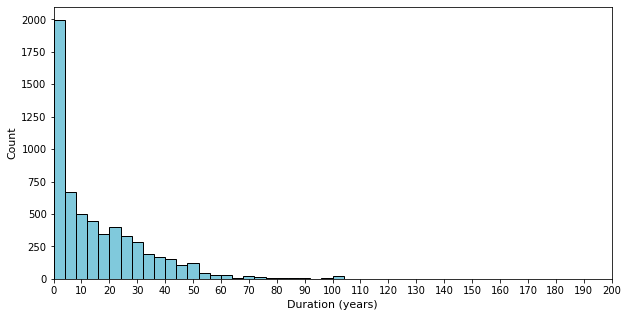

In [ ]:
# Produce histogram of the duration of activity  
plt.figure(figsize=(10,5))
chart = sns.histplot(data = dates, 
                     x = "time_span", 
                     bins = 50, 
                     color = "#55b8d1")
chart.set_xlabel("Duration (years)", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
chart.xaxis.set_major_locator(ticker.MultipleLocator(10))
chart.xaxis.set_major_formatter(ticker.ScalarFormatter())
chart.set_xlim([0, 200])
plt.savefig("duration.svg")

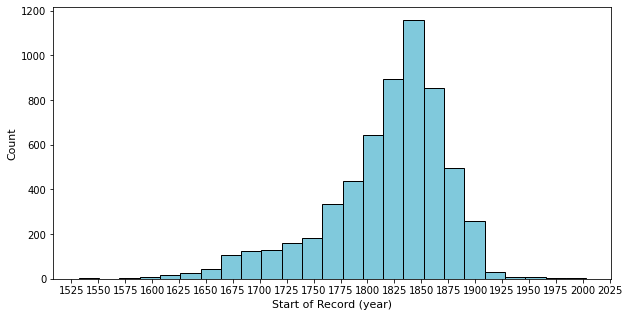

In [ ]:
# Produce histogram of start years 
plt.figure(figsize=(10,5))
chart = sns.histplot(data = dates, 
                     x = "year_from", 
                     bins = 25, 
                     color = "#55b8d1")
chart.set_xlabel("Start of Record (year)", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
chart.xaxis.set_major_locator(ticker.MultipleLocator(25))
chart.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.savefig("start_year.svg")

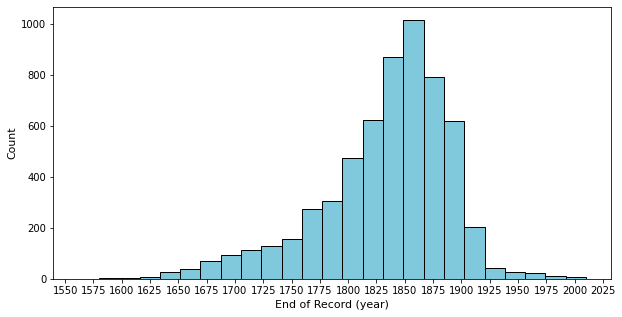

In [ ]:
# Produce histogram of end years 
plt.figure(figsize=(10,5))
chart = sns.histplot(data = dates, 
                     x = "year_to", 
                     bins = 25,
                     color = "#55b8d1")
chart.set_xlabel("End of Record (year)", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
chart.xaxis.set_major_locator(ticker.MultipleLocator(25))
chart.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.savefig("end_year.svg")

<Figure size 720x360 with 0 Axes>

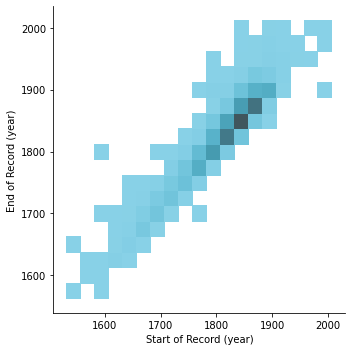

In [ ]:
# Produce bivariate plot showing both start and end years 
plt.figure(figsize=(10,5))
chart = sns.displot(data = dates, 
                    x="year_from", 
                    y="year_to", 
                    binwidth=(25, 25),
                    color = "#55b8d1")
plt.xlabel("Start of Record (year)")
plt.ylabel("End of Record (year)")
plt.savefig("bivariate.svg")


# **4. Create a Dataframe of Time Intervals**

The dataframe created here will be used later on to create time span nodes in the labelled property graph. Relationships between these nodes and the person nodes created from the i_df dataframe will be created if the maker activity data contained in the i_df dataframe indicates that an individual was active in a particular period. Through this process, it will be possible to map maker activity through segments of time.  

In [ ]:
# Define the start of the overall date range as the earliest date in the year_from column in the i_df dataframe, rounded down to the nearest decade
data_start = math.floor(int(num_dates_from.min()) / 10) * 10
print(data_start)

1530


In [ ]:
# Define the end of the date range as the latest date in the year_to column in the i_df dataframe, rounded up to the nearest decade 
data_end = math.ceil(int(num_dates_to.max()) /10 ) * 10
print(data_end)

2010


In [ ]:
# Select the desired periodicity 
year_intervals = 10

# Calculate how many intervals are needed.
factor = math.ceil( (data_end - data_start) / year_intervals )

# Rename variable for start of period so that it is consistent with variable name for end of period
period_start = data_start

# Calculate the end point of the range
period_end = period_start + year_intervals * factor + 1 if period_start + year_intervals * factor <= data_end else period_start + year_intervals * factor 

# Create a new dataframe, t_df with a column period_start as the first column, containing the start year for each period 
t_df = pd.DataFrame({"period_start" : pd.Series(range(period_start, period_end, year_intervals))})

# Create period_end: the end year for each period 
t_df = t_df.assign(period_end = lambda x: x.period_start + (year_intervals - 1))

# Convert both period_start and period_end to strings to allow for a period_label column to be created
t_df = t_df.astype({"period_start" : "string", "period_end" : "string"})

# Create period_label: a string denoting the time span of the period as the range from period_start to period_end
t_df["period_label"] = t_df["period_start"] + " - " + t_df["period_end"]

# Create a new column that specifies period_start as a date time in YYYY-MM-DD HH:mm:ss format 
t_df["period_start_dt"] = t_df["period_start"].apply(lambda x: datetime.strptime(x, "%Y").strftime("%Y-%m-%d %H:%M:%S"))

# Create a new column that specifies period_end as a date time in YYYY-MM-DD HH:mm:ss format
t_df["period_end_dt"] = t_df["period_end"].apply(lambda x: datetime.strptime(x, "%Y").strftime("%Y-%m-%d %H:%M:%S"))


In [ ]:
# Check the final shape of the dataframe 
t_df.head(50)

,period_start,period_end,period_label,period_start_dt,period_end_dt
0,1530,1539,1530 - 1539,1530-01-01 00:00:00,1539-01-01 00:00:00
1,1540,1549,1540 - 1549,1540-01-01 00:00:00,1549-01-01 00:00:00
2,1550,1559,1550 - 1559,1550-01-01 00:00:00,1559-01-01 00:00:00
3,1560,1569,1560 - 1569,1560-01-01 00:00:00,1569-01-01 00:00:00
4,1570,1579,1570 - 1579,1570-01-01 00:00:00,1579-01-01 00:00:00
5,1580,1589,1580 - 1589,1580-01-01 00:00:00,1589-01-01 00:00:00
6,1590,1599,1590 - 1599,1590-01-01 00:00:00,1599-01-01 00:00:00
7,1600,1609,1600 - 1609,1600-01-01 00:00:00,1609-01-01 00:00:00
8,1610,1619,1610 - 1619,1610-01-01 00:00:00,1619-01-01 00:00:00
9,1620,1629,1620 - 1629,1620-01-01 00:00:00,1629-01-01 00:00:00


# **5. Clean Relationships Data**

In [ ]:
# Read in the raw data file from Github
r_url = "https://raw.githubusercontent.com/MissMaya/CASA0004_DISSERTATION/main/raw_data/relations.csv"
r_df = pd.read_csv(r_url)

In [ ]:
# Check the shape of the dataframe
r_df.head()

,source_maker_id,source_maker_surname,source_maker_first_name,source_maker_date_1,source_maker_date_2,relation_description,relation_code,target_maker_id,target_maker_surname,target_maker_first_name,target_maker_date_1,target_maker_date_2
0,2806,\,William,1808-01-01,1808-01-01,See Also,14,2028,CARPENTER,Philip,1808-01-01,1833-01-01
1,1122,AARON,Aaron,1805-01-01,1822-01-01,Associated with,15,1671,AARON & CO.,Isaac,1801-01-01,1801-01-01
2,1122,AARON,Aaron,1805-01-01,1822-01-01,Associated with,15,1670,AARON & SON,Isaac,1794-01-01,1814-01-01
3,1671,AARON & CO.,Isaac,1801-01-01,1801-01-01,Associated with,15,1670,AARON & SON,Isaac,1794-01-01,1814-01-01
4,1671,AARON & CO.,Isaac,1801-01-01,1801-01-01,Associated with,15,1122,AARON,Aaron,1805-01-01,1822-01-01


In [ ]:
# Check the data types
r_df.dtypes

source_maker_id             int64
source_maker_surname       object
source_maker_first_name    object
source_maker_date_1        object
source_maker_date_2        object
relation_description       object
relation_code               int64
target_maker_id             int64
target_maker_surname       object
target_maker_first_name    object
target_maker_date_1        object
target_maker_date_2        object
dtype: object

In [ ]:
# Keep only selected columns 

keep = ["source_maker_id",
        "relation_description",
        "target_maker_id"]

r_df = r_df.drop(r_df.columns.difference(keep), axis = 1)

In [ ]:
# Rename columns 
r_df.rename(columns = {"source_maker_id" : "source", "relation_description" : "relationship", "target_maker_id" : "target"}, inplace = True)


In [ ]:
# Rename null values in "relationship" column  
r_df["relationship"] = r_df["relationship"].fillna("UNKNOWN_RELATION")

In [ ]:
# Convert values in "relationship" column to upper case and replace spaces with "_"
# Conversion in line with Neo4j naming conventions 
r_df["relationship"] = r_df["relationship"].str.upper().str.replace(" ","_")

In [ ]:
# Check that shape of dataframe is as expected at this point
r_df.head()

,source,relationship,target
0,2806,SEE_ALSO,2028
1,1122,ASSOCIATED_WITH,1671
2,1122,ASSOCIATED_WITH,1670
3,1671,ASSOCIATED_WITH,1670
4,1671,ASSOCIATED_WITH,1122


In [ ]:
# Count unique values in "relationship" column 
r_df["relationship"].nunique()

33

In [ ]:
# List unique values in "relationship" column 
print(r_df["relationship"].unique())

['SEE_ALSO' 'ASSOCIATED_WITH' 'HAD_APPRENTICE' 'APPRENTICED_TO'
 'SUCCEEDED__BY' 'EMPLOYED_BY' 'TOOK_OVER_FROM' 'CHILD_OF' 'SPOUSE_OF'
 'PARENT_OF' 'SIBLING_OF' 'SAME_PREMISES_AS' 'WORKED_FOR' 'PARTNERSHIP'
 'AGENT_TO' 'NEPHNEICE_OF' 'COUSIN_OF' 'UNCAUNT_OF' 'SUPPLIED_TO'
 'GRANDCHILD_OF' 'UNKNOWN_RELATION' 'SUPPLIED_BY' 'SON-IN-LAW_OF'
 'STEP-PARENT_OF' 'STEPCHILD_OF' 'OWNED_BY' 'OWNER_OF' 'FRIEND_OF'
 'FATHER-IN-LAW_OF' 'BROTHER-IN-LAW_OF' 'SUBCONTRACTOR_TO'
 'FELLOW_APPRENTICE_OF' 'SUPPLIED_TO,_CREDITOR_OF']


In [ ]:
# Rename selected values in "relationship" column
# "FELLOW_APPRENTICE_OF" seems to denote instances in which an individual was apprenticed more than once
# "SUPPLIED_TO,_CREDITOR_OF" appears in only 2 instances and has been amalgamated with "SUPPLIED_TO" for simplicity
new_rels = {"UNCAUNT_OF" : "UNCLE_AUNT_OF",
            "SON-IN-LAW_OF" : "SON_IN_LAW_OF",
            "NEPHNEICE_OF" : "NEPHEW_NIECE_OF",
            "BROTHER-IN-LAW_OF" : "BROTHER_IN_LAW_OF",
            "FELLOW_APPRENTICE_OF" : "APPRENTICED_TO",
            "FATHER-IN-LAW_OF" : "FATHER_IN_LAW_OF",
            "STEP-PARENT_OF" : "STEP_PARENT_OF",
            "SUPPLIED_TO,_CREDITOR_OF" : "SUPPLIED_TO"
            }

r_df["relationship"] = r_df["relationship"].replace(new_rels)

In [ ]:
# Check the revised list of unique values in the "relationship" column
print(r_df["relationship"].unique())

['SEE_ALSO' 'ASSOCIATED_WITH' 'HAD_APPRENTICE' 'APPRENTICED_TO'
 'SUCCEEDED__BY' 'EMPLOYED_BY' 'TOOK_OVER_FROM' 'CHILD_OF' 'SPOUSE_OF'
 'PARENT_OF' 'SIBLING_OF' 'SAME_PREMISES_AS' 'WORKED_FOR' 'PARTNERSHIP'
 'AGENT_TO' 'NEPHEW_NIECE_OF' 'COUSIN_OF' 'UNCLE_AUNT_OF' 'SUPPLIED_TO'
 'GRANDCHILD_OF' 'UNKNOWN_RELATION' 'SUPPLIED_BY' 'SON_IN_LAW_OF'
 'STEP_PARENT_OF' 'STEPCHILD_OF' 'OWNED_BY' 'OWNER_OF' 'FRIEND_OF'
 'FATHER_IN_LAW_OF' 'BROTHER_IN_LAW_OF' 'SUBCONTRACTOR_TO']


In [ ]:
# Check the shape of the cleaned dataframe 
r_df.head()

,source,relationship,target
0,2806,SEE_ALSO,2028
1,1122,ASSOCIATED_WITH,1671
2,1122,ASSOCIATED_WITH,1670
3,1671,ASSOCIATED_WITH,1670
4,1671,ASSOCIATED_WITH,1122


In [ ]:
# Count the number of relationships 
r_df["relationship"].count()


10046

In [ ]:
# Generate a frequency table of the categories of relationships 
r_df["relationship"].value_counts()

SEE_ALSO             3360
TOOK_OVER_FROM       1147
SUCCEEDED__BY        1044
HAD_APPRENTICE        930
APPRENTICED_TO        829
ASSOCIATED_WITH       560
CHILD_OF              469
PARENT_OF             389
PARTNERSHIP           274
SIBLING_OF            266
WORKED_FOR            196
EMPLOYED_BY           149
SAME_PREMISES_AS      146
SPOUSE_OF             114
UNKNOWN_RELATION       39
NEPHEW_NIECE_OF        33
UNCLE_AUNT_OF          26
SUPPLIED_TO            25
GRANDCHILD_OF          11
COUSIN_OF               8
OWNED_BY                6
AGENT_TO                5
SUPPLIED_BY             4
FATHER_IN_LAW_OF        4
SON_IN_LAW_OF           3
STEPCHILD_OF            2
FRIEND_OF               2
BROTHER_IN_LAW_OF       2
STEP_PARENT_OF          1
OWNER_OF                1
SUBCONTRACTOR_TO        1
Name: relationship, dtype: int64

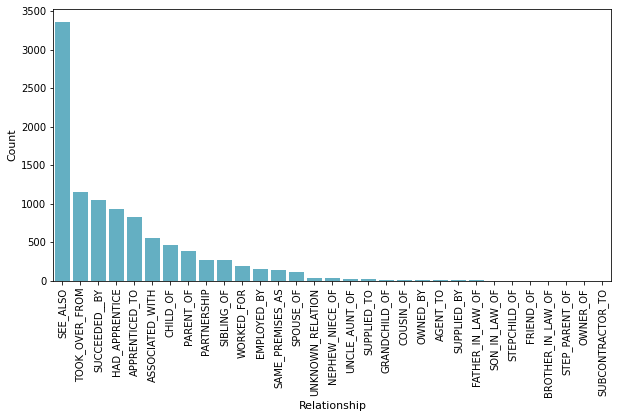

In [ ]:
# Distribution of relationships 
plt.figure(figsize=(10,5))
chart = sns.countplot(data = r_df, 
                      x = "relationship",
                      order = pd.value_counts(r_df["relationship"]).index,
                      color = "#55b8d1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("Relationship", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
plt.savefig("relationships.svg")

In [ ]:
familial = ["CHILD_OF",
            "PARENT_OF",
            "SIBLING_OF",
            "SPOUSE_OF",
            "UNKNOWN_RELATION",
            "NEPHEW_NIECE_OF",
            "UNCLE_AUNT_OF",
            "GRANDCHILD_OF",
            "COUSIN_OF",
            "FATHER_IN_LAW_OF",
            "SON_IN_LAW_OF"
            "BROTHER_IN_LAW_OF",
            "STEPCHILD_OF",
            "STEP_PARENT_OF"]

In [ ]:
boolean_series = r_df["relationship"].isin(familial)
familial_df = r_df[boolean_series]

In [ ]:
# Calculate proportion of relationships marked "SEE_ALSO"
r_df["relationship"].value_counts()["SEE_ALSO"] / r_df["relationship"].count() * 100

33.44614772048576

In [ ]:
# Calculate proportion of familial relationships

len(familial_df["relationship"]) / len(r_df["relationship"]) * 100

13.557634879554051

# **6. Clean Street Level Address Data**

In [ ]:
# Read in the raw data file from Github
a_url = "https://raw.githubusercontent.com/MissMaya/CASA0004_DISSERTATION/main/raw_data/addresses.csv"
a_df = pd.read_csv(a_url)

In [ ]:
# Check the shape of the dataframe 
a_df.head()

,address_id,maker_id,surname,first_name,street_1,street_2,town,match_text,gb1900_text,gb1900_id,lat,lon
0,21604,11414,RICHARD,Benoit,"58 F Hatton Garden,",NaN,London EC,Hatton Garden,Hatton Garden,57f5a8892c66dcab3d018272,51.520856,-0.108769
1,21603,11413,NEWBOLD & CO.,A. E.,"70 Grays Inn Rd,",NaN,London WC,GRAY'S INN ROAD,GRAY'S INN ROAD,5803bba72c66dcab3d07b61e,51.527997,-0.119165
2,21602,11412,MILL,Julian Thomas,"48 Myddelton St,",NaN,London EC,MYDDELTON STREET,MYDDELTON STREET,57f3a6ca2c66dcab3d008bf8,51.526735,-0.107278
3,21601,11411,KRIMM,Franz,"23 Hatton Garden,",NaN,London EC,Hatton Garden,Hatton Garden,57f5a8892c66dcab3d018272,51.520856,-0.108769
4,21597,11410,HAMMERSLEY BROTHERS,NaN,"17 Station Buildings, Acton St,",NaN,London NE,Acton Street,Acton Street,580920b82c66dc1ce5011efd,51.538842,-0.076336


In [ ]:
# Check the data types
a_df.dtypes

address_id       int64
maker_id         int64
surname         object
first_name      object
street_1        object
street_2        object
town            object
match_text      object
gb1900_text     object
gb1900_id       object
lat            float64
lon            float64
dtype: object

In [ ]:
# Rename "maker_id" to "id" to be consistent with other CSV files 
a_df.rename(columns = {"maker_id" : "id"}, inplace = True)

In [ ]:
# Check that there are no null values in the "id" column
a_df["id"].isnull().any()

False

In [ ]:
# Determine the number of unique addresses
a_df.nunique()

address_id     7759
id             4543
surname        2912
first_name     1256
street_1       5911
street_2         33
town             23
match_text      836
gb1900_text     836
gb1900_id       842
lat             819
lon             825
dtype: int64

In [ ]:
# Drop selected columns
# Dropping "town" here because the higher level location data is much richer in terms of this information: 23 unique towns in this dataframe vs 554 in the locations dataframe below 
to_drop = ["address_id",
           "surname",
           "first_name",
           "street_2",
           "town",
           "match_text",
           "gb1900_text",
           "gb1900_id"]

a_df = a_df.drop(to_drop, axis=1)     

In [ ]:
# Rename street_1 to street
a_df.rename(columns = {"street_1" : "street"}, inplace = True)

In [ ]:
# Filter the a_df dataframe of street addresses to retain only those with a matching id in i_df, the dataframe containing the individual makers
a_df = a_df[a_df["id"].isin(i_df["id"])]

In [ ]:
# Number of addresses in a_df after the filtering
len(a_df)

4990

In [ ]:
# Determine number of unique addresses remaining after the filtering
a_df.nunique()

id        2634
street    3726
lat        589
lon        587
dtype: int64

In [ ]:
# Create a dataframe preserving only the first of the duplicated strings in "street" from a_df
dupes = a_df.drop_duplicates(subset = "street")

In [ ]:
# Check that dupes is of the expected length
len(dupes)

3726

In [ ]:
# Create 2 dictionaries:
# lat_dict => a dictionary with "street" from dupes as keys and "lat" as values
# lon_dict => a dictionary with "street" from dupes as keys and "lon" as values

lat_dict = dupes.set_index("street").to_dict()["lat"]
lon_dict = dupes.set_index("street").to_dict()["lon"]

In [ ]:
# Perform 2 non-exhaustive mappings
# Mapping 1: map latitudes in lat_dict to a_df["lat"] using streets in lat_dict as keys
# Mapping 2: map longitudes in lon_dict to a_df["lon"] using streets in lon_dict as keys
# This ensures that all addresses with matching strings in a_df["street"] have the same values of "lat" and "lon"
a_df["lat"] = a_df["street"].map(lat_dict).fillna(a_df["lat"])
a_df["lon"] = a_df["street"].map(lon_dict).fillna(a_df["lon"])


In [ ]:
# Concatenate lat and lon coordinates in a new column
# This column will be used to set uniqueness constraints in the database

# Convert both lat and lon to strings to allow for a coordnate_label column to be created
a_df = a_df.astype({"lat" : "string", "lon" : "string"})

# Create the column containing the concatenated lat and lon combinations 
a_df["coordinate_label"] = a_df["lat"] + a_df["lon"]



In [ ]:
# Sort dataframe in ascending order of ids
a_df = a_df.sort_values(by = ["id"]);

In [ ]:
# Check retained columns in dataframe
a_df.head()

,id,street,lat,lon,coordinate_label
7758,5,"Archimedes & Globe in Dean St, nr. St.Anne's C...",51.5149321514664,-0.133531093597412,51.5149321514664-0.133531093597412
7757,5,"Archimedes & Globe in Market St, nr. St.Anne's...",51.5174959202116,-0.171414613723755,51.5174959202116-0.171414613723755
7756,7,"Golden Spectacles & Quadrant, Ludgate St,",51.5140241154312,-0.103211402893066,51.5140241154312-0.103211402893066
7755,10,"Little Tower Hill,",51.5071064232539,-0.0740396976470947,51.5071064232539-0.0740396976470947
7754,10,"Postern Row, Tower Hill,",51.5092165642489,-0.078202486038208,51.5092165642489-0.078202486038208


# **7. Clean Town Level Location Data**

In [ ]:
# Read in the raw data file from Github
l_url = "https://raw.githubusercontent.com/MissMaya/CASA0004_DISSERTATION/main/raw_data/towns.csv"
l_df = pd.read_csv(l_url)

In [ ]:
# Sort dataframe in ascending order of ids:
l_df = l_df.sort_values(by = ["id"]);

In [ ]:
# Check the shape of the dataframe
l_df.head()

,id,surname,first_name,date_1,date_2,town,town_date_1,town_date_2,lon,lat
24,1,ABRAHAM,Abraham,1818,1850,Liverpool,1829,1834,-2.99168,53.407199
20,1,ABRAHAM,Abraham,1818,1850,Liverpool,1818,1820,-2.99168,53.407199
25,1,ABRAHAM,Abraham,1818,1850,Liverpool,1837,1839,-2.99168,53.407199
26,1,ABRAHAM,Abraham,1818,1850,Liverpool,1837,1839,-2.99168,53.407199
23,1,ABRAHAM,Abraham,1818,1850,Liverpool,1827,1827,-2.99168,53.407199


In [ ]:
# Check length of dataframe
len(l_df)

20686

In [ ]:
# Check the data types
l_df.dtypes

id               int64
surname         object
first_name      object
date_1           int64
date_2           int64
town            object
town_date_1     object
town_date_2     object
lon            float64
lat            float64
dtype: object

In [ ]:
# Check that there are no null values in the "id" column
l_df["id"].isnull().any()

False

In [ ]:
# Determine how many unique town locations there are  
l_df.nunique()

id             11002
surname         6037
first_name      2328
date_1           352
date_2           380
town             554
town_date_1      482
town_date_2      512
lon              550
lat              550
dtype: int64

In [ ]:
# Drop selected columns
to_drop = ["surname",
           "first_name",
           "date_1",
           "date_2"]

l_df = l_df.drop(to_drop, axis=1)          

In [ ]:
# Rename all values in l_df not containing 4 digits from the "town_date_1" and "town_date_to" columns 
l_df["town_date_1"] = l_df["town_date_1"].astype(str).str.replace(r"^(?!\d{4}).*", "no_date", regex = True)
l_df["town_date_2"] = l_df["town_date_2"].astype(str).str.replace(r"^(?!\d{4}).*", "no_date", regex = True)

In [ ]:
# Rename all null values in l_df in the "town_date_1" and "town_date_2" columns (regex did not capture null values)
l_df["town_date_1"] = l_df["town_date_1"].fillna("no_date")
l_df["town_date_2"] = l_df["town_date_2"].fillna("no_date")

In [ ]:
# Check final shape of the dataframe
l_df.head()

,id,town,town_date_1,town_date_2,lon,lat
24,1,Liverpool,1829,1834,-2.99168,53.407199
20,1,Liverpool,1818,1820,-2.99168,53.407199
25,1,Liverpool,1837,1839,-2.99168,53.407199
26,1,Liverpool,1837,1839,-2.99168,53.407199
23,1,Liverpool,1827,1827,-2.99168,53.407199


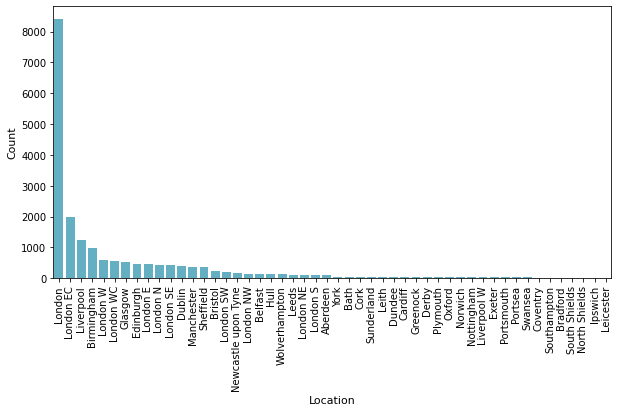

In [ ]:
# Plot distribution of locations
plt.figure(figsize=(10,5))
chart = sns.countplot(data = l_df, 
                      x = "town",
                      order = pd.value_counts(l_df["town"]).iloc[:50].index,
                      color = "#55b8d1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("Location", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
plt.savefig("locations.svg")

# **8. Clean Trades Data**

In [ ]:
# Read in the raw data file from Github 
tg_url = "https://raw.githubusercontent.com/MissMaya/CASA0004_DISSERTATION/main/raw_data/trades.csv"
tg_df = pd.read_csv(tg_url)

In [ ]:
# Check the shape of the dataframe
tg_df.head()

,ref,date,name,other_trades,Other Trades Parenth,Other Trades Dates,Other Trade Suffix 2,Role_primary,Relation to,RoleRelationDates,...,IM Dates Parenth,Material,Qualifier IM,seller_trades,Seller_trades parenth,Seller trade dates,maker_trades,Maker_trade parentheses 1,Maker_trade Date Qual,Maker_qualifier
0,1.0,1818-01-01T00:00:00Z,ABRAHAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1818-01-01T00:00:00Z,ABRAHAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1818-01-01T00:00:00Z,ABRAHAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,1770-01-01T00:00:00Z,BERRICK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Rule,NaN,NaN,NaN
4,3.0,1790-01-01T00:00:00Z,FIELD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check the data types
tg_df.dtypes

ref                          float64
date                          object
name                          object
other_trades                  object
Other Trades Parenth          object
Other Trades Dates            object
Other Trade Suffix 2          object
Role_primary                  object
Relation to                   object
RoleRelationDates             object
guild_memberships             object
opticians                     object
seller_descriptions           object
Qualifier IS                  object
Dates IS                      object
maker_descriptions            object
IM Dates Parenth              object
Material                      object
Qualifier IM                  object
seller_trades                 object
Seller_trades parenth         object
Seller trade dates            object
maker_trades                  object
Maker_trade parentheses 1     object
Maker_trade Date Qual         object
Maker_qualifier               object
dtype: object

In [ ]:
# Convert columnn names to lower case and replace spaces with underscores for consistent naming conventions 
tg_df.columns = tg_df.columns.str.lower().str.replace(" ","_")

In [ ]:
# Rename "ref" to "id" 
tg_df.rename(columns = {"ref" : "id"}, inplace = True)

In [ ]:
# Drop any rows with no value in "id" column
tg_df = tg_df.dropna(subset=["id"])

In [ ]:
# Change data type of "id" from float to int 
tg_df["id"] = tg_df["id"].astype(int)


<ipython-input-473-951789f335cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tg_df["id"] = tg_df["id"].astype(int)


In [ ]:
# Print column names for inspection
list(tg_df.columns)

['id',
 'date',
 'name',
 'other_trades',
 'other_trades_parenth',
 'other_trades_dates',
 'other_trade_suffix_2',
 'role_primary',
 'relation_to',
 'rolerelationdates',
 'guild_memberships',
 'opticians',
 'seller_descriptions',
 'qualifier_is',
 'dates_is',
 'maker_descriptions',
 'im_dates_parenth',
 'material',
 'qualifier_im',
 'seller_trades',
 'seller_trades_parenth',
 'seller_trade_dates',
 'maker_trades',
 'maker_trade_parentheses_1',
 'maker_trade_date_qual',
 'maker_qualifier']

In [ ]:
# Drop selected columns
to_drop = ["date",
           "name",
           "other_trades_dates",
           "other_trade_suffix_2",
           "rolerelationdates",
           "opticians",
           "qualifier_is",
           "dates_is",
           "im_dates_parenth",
           "seller_trade_dates",
           "maker_trade_date_qual"]

tg_df = tg_df.drop(to_drop, axis=1)

In [ ]:
# Check reduced list of columns 
list(tg_df.columns)

['id',
 'other_trades',
 'other_trades_parenth',
 'role_primary',
 'relation_to',
 'guild_memberships',
 'seller_descriptions',
 'maker_descriptions',
 'material',
 'qualifier_im',
 'seller_trades',
 'seller_trades_parenth',
 'maker_trades',
 'maker_trade_parentheses_1',
 'maker_qualifier']

In [ ]:
# Check the shape of the cleaned dataframe
tg_df.head()

,id,other_trades,other_trades_parenth,role_primary,relation_to,guild_memberships,seller_descriptions,maker_descriptions,material,qualifier_im,seller_trades,seller_trades_parenth,maker_trades,maker_trade_parentheses_1,maker_qualifier
0,1,NaN,NaN,NaN,NaN,NaN,NaN,Philosophical,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,Mathematical,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rule,NaN,NaN
4,3,NaN,NaN,NaN,NaN,NaN,NaN,Philosophical,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Count the number of values in each column
# Use these counts to determine which columns are the most useful for analysis 

tg_df.count()

id                           27318
other_trades                   596
other_trades_parenth           144
role_primary                  1946
relation_to                   1278
guild_memberships             1837
seller_descriptions            138
maker_descriptions            4540
material                        21
qualifier_im                    20
seller_trades                  393
seller_trades_parenth           42
maker_trades                 15013
maker_trade_parentheses_1     1148
maker_qualifier                 10
dtype: int64

In [ ]:
# Count unique values in each column 
tg_df.nunique()

id                           9311
other_trades                  121
other_trades_parenth           49
role_primary                   84
relation_to                   276
guild_memberships              56
seller_descriptions            13
maker_descriptions             36
material                       10
qualifier_im                   10
seller_trades                  65
seller_trades_parenth          20
maker_trades                  217
maker_trade_parentheses_1     160
maker_qualifier                 8
dtype: int64

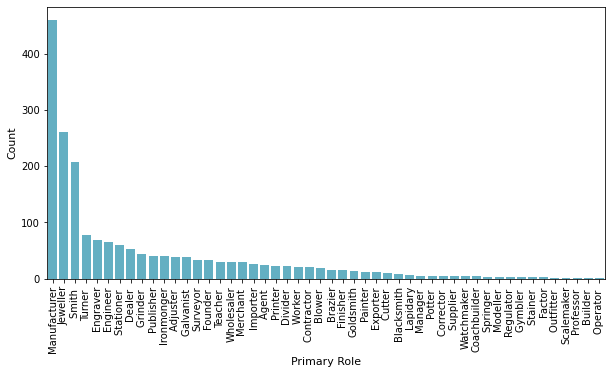

In [ ]:
# Distribution of primary roles
plt.figure(figsize=(10,5))
chart = sns.countplot(data = tg_df, 
                      x = "role_primary",
                      order = pd.value_counts(tg_df["role_primary"]).iloc[:50].index,
                      color = "#55b8d1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("Primary Role", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
plt.savefig("primary_roles.svg")

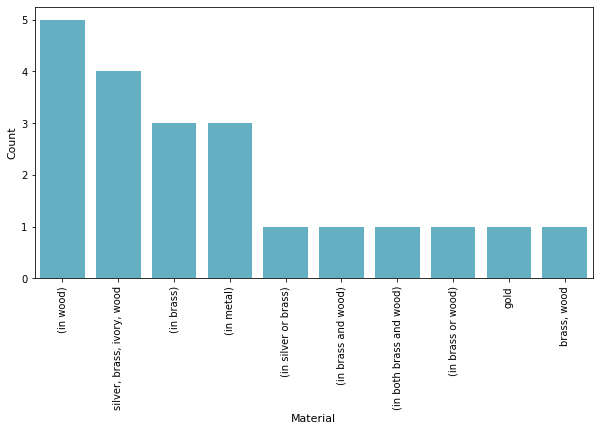

In [ ]:
# Distribution of materials used 
plt.figure(figsize=(10,5))
chart = sns.countplot(data = tg_df, 
                      x = "material",
                      order = pd.value_counts(tg_df["material"]).iloc[:50].index,
                      color = "#55b8d1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("Material", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
plt.savefig("materials.svg")

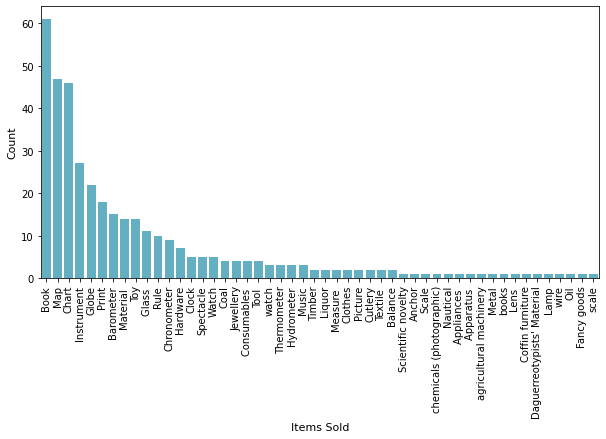

In [ ]:
# Distribution of seller trades
plt.figure(figsize=(10,5))
chart = sns.countplot(data = tg_df, 
                      x = "seller_trades",
                      order = pd.value_counts(tg_df["seller_trades"]).iloc[:50].index,
                      color = "#55b8d1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("Items Sold", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
plt.savefig("seller_trades.svg")

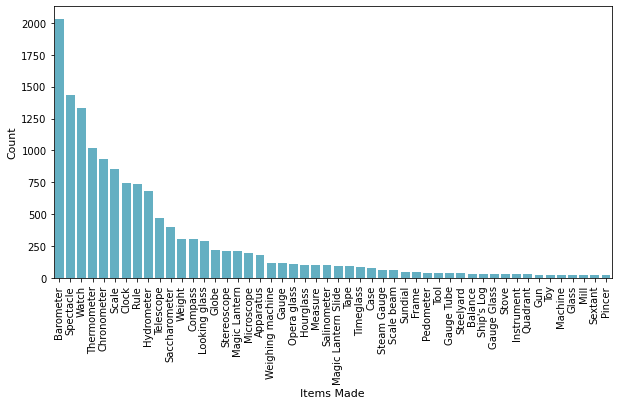

In [ ]:
# Distribution of maker trades
plt.figure(figsize=(10,5))
chart = sns.countplot(data = tg_df, 
                      x = "maker_trades",
                      order = pd.value_counts(tg_df["maker_trades"]).iloc[:50].index,
                      color = "#55b8d1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("Items Made", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
plt.savefig("maker_trades.svg")

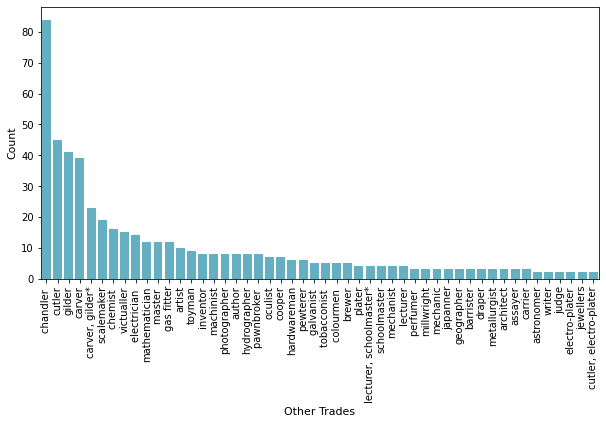

In [ ]:
# Distribution of other trades
plt.figure(figsize=(10,5))
chart = sns.countplot(data = tg_df, 
                      x = "other_trades",
                      order = pd.value_counts(tg_df["other_trades"]).iloc[:50].index,
                      color = "#55b8d1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("Other Trades", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
plt.savefig("other_trades.svg")

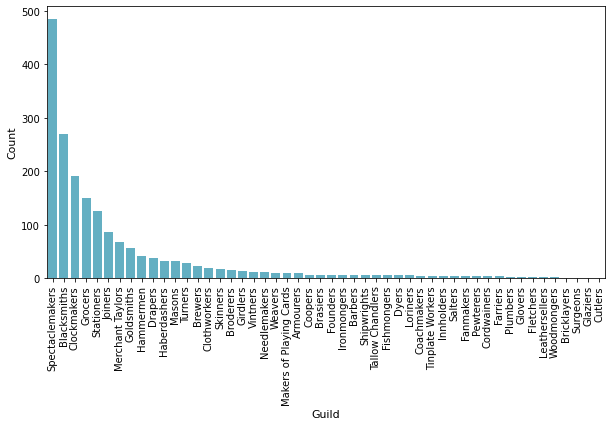

In [ ]:
# Distribution of guild memberships 
plt.figure(figsize=(10,5))
chart = sns.countplot(data = tg_df, 
                      x = "guild_memberships",
                      order = pd.value_counts(tg_df["guild_memberships"]).iloc[:50].index,
                      color = "#55b8d1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel("Guild", fontsize = 11)
chart.set_ylabel("Count", fontsize = 11)
plt.savefig("guild_memberships.svg")

# **9. Create Subset of data for Testing**

In [ ]:
subset_rows = 50

# Create new dataframe from relationships data consisting of the first n rows as specified by subset_rows
r_df_subset = r_df.head(subset_rows)

# Append "target" to "source" rows to create a list of subset ids
subset_ids = r_df_subset["source"].append(r_df_subset["target"])

# Subset individuals data by selecting only the ids in subset_ids  
i_df_subset = i_df[i_df["id"].isin(subset_ids)]

# Subset address data by selecting only the ids in subset_ids
a_df_subset = a_df[a_df["id"].isin(subset_ids)]

# Subset location data by selecting only the ids in subset_ids 
l_df_subset = l_df[l_df["id"].isin(subset_ids)]

# Subset trades and guilds data by selecting only the ids in subset_ids 
tg_df_subset = tg_df[tg_df["id"].isin(subset_ids)]




# **10. Save Full Cleaned Files to Google Drive**

In [ ]:
# Individuals 
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/full_cleaned_data/full_individuals_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  i_df.to_csv(f, index = False)

In [ ]:
# Relationships
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/full_cleaned_data/full_relationships_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  r_df.to_csv(f, index = False)

In [ ]:
# Addresses
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/full_cleaned_data/full_addresses_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  a_df.to_csv(f, index = False)

In [ ]:
# Locations
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/full_cleaned_data/full_locations_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  l_df.to_csv(f, index = False)

In [ ]:
# Trades and Guilds
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/full_cleaned_data/full_trades_guilds_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  tg_df.to_csv(f, index = False)

In [ ]:
# Time Intervals
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/full_cleaned_data/time_intervals.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  t_df.to_csv(f, index = False)


# **11. Save Subsetted Cleaned Files to Google Drive**

In [ ]:
# Individuals
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/subset_cleaned_data/subset_individuals_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  i_df_subset.to_csv(f, index = False)

In [ ]:
# Relationships
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/subset_cleaned_data/subset_relationships_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  r_df_subset.to_csv(f, index = False)

In [ ]:
# Addresses 
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/subset_cleaned_data/subset_addresses_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  a_df_subset.to_csv(f, index = False)

In [ ]:
# Locations
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/subset_cleaned_data/subset_locations_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  l_df_subset.to_csv(f, index = False)

In [ ]:
# Trades and Guilds
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/subset_cleaned_data/subset_trades_guilds_cleaned.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  tg_df_subset.to_csv(f, index = False)

In [ ]:
# Time Intervals 
path = "/content/drive/MyDrive/dissertation/CASA0004_DISSERTATION/subset_cleaned_data/subset_time_intervals.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
  t_df.to_csv(f, index = False)
